In [1]:
import pandas as pd

def feature_engineering(file_path, output_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Convert order_date to datetime
    df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
    
    # Extract day of the week (0=Monday, 6=Sunday)
    df['day_of_week'] = df['order_date'].dt.dayofweek
    
    # Extract month
    df['month'] = df['order_date'].dt.month
    
    # Identify weekends (Saturday=5, Sunday=6)
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    # Define a list of common holidays (New Year, Christmas, Independence Day, New Year's Eve)
    common_holidays = ['01-01', '25-12', '04-07', '31-12']
    df['is_holiday'] = df['order_date'].dt.strftime('%d-%m').isin(common_holidays).astype(int)
    
    # Example promotional periods (January sales and Black Friday in November)
    df['is_promo_period'] = df['month'].isin([1, 11]).astype(int)
    
    # Save the processed file
    df.to_csv(output_path, index=False)
    print(f"Feature engineered data saved to {output_path}")

# Example usage
input_file = r"C:\Soundhar\VS Code\project\Dominos\Cleaned_Pizza_Sales.csv" 
output_file = r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv"
feature_engineering(input_file, output_file)


Feature engineered data saved to C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv


Feature engineered data saved to C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the 

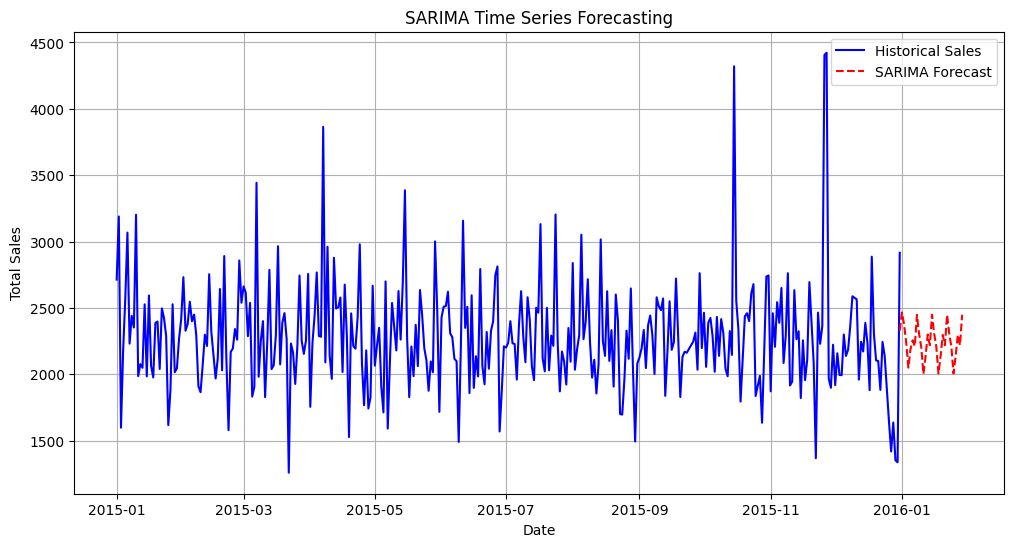

SARIMA Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                       total_price   No. Observations:                  358
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -2536.281
Date:                           Sun, 30 Mar 2025   AIC                           5082.563
Time:                                   10:39:37   BIC                           5101.737
Sample:                                        0   HQIC                          5090.201
                                           - 358                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3453      0.285     -1.210      0.226      -0.904       0.214
ma.L1          0.4635

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def feature_engineering(file_path, output_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Convert order_date to datetime
    df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
    
    # Extract day of the week (0=Monday, 6=Sunday)
    df['day_of_week'] = df['order_date'].dt.dayofweek
    
    # Extract month
    df['month'] = df['order_date'].dt.month
    
    # Identify weekends (Saturday=5, Sunday=6)
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    # Define a list of common holidays (New Year, Christmas, Independence Day, New Year's Eve)
    common_holidays = ['01-01', '25-12', '04-07', '31-12']
    df['is_holiday'] = df['order_date'].dt.strftime('%d-%m').isin(common_holidays).astype(int)
    
    # Example promotional periods (January sales and Black Friday in November)
    df['is_promo_period'] = df['month'].isin([1, 11]).astype(int)
    
    # Save the processed file
    df.to_csv(output_path, index=False)
    print(f"Feature engineered data saved to {output_path}")

def train_sarima_model(file_path):
    # Load processed data
    df = pd.read_csv(file_path)
    df['order_date'] = pd.to_datetime(df['order_date'])
    
    # Aggregate daily sales
    daily_sales = df.groupby('order_date')['total_price'].sum()
    
    # Define SARIMA model (p, d, q) x (P, D, Q, s) - seasonal component set to weekly (7 days)
    model = SARIMAX(daily_sales, order=(1, 0, 1), seasonal_order=(1, 1, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
    sarima_result = model.fit()
    
    # Forecast next 30 days
    forecast = sarima_result.get_forecast(steps=30)
    forecast_index = pd.date_range(start=daily_sales.index[-1], periods=30, freq='D')
    forecast_values = forecast.predicted_mean
    
    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales.index, daily_sales, label='Historical Sales', color='blue')
    plt.plot(forecast_index, forecast_values, label='SARIMA Forecast', color='red', linestyle='dashed')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.title('SARIMA Time Series Forecasting')
    plt.legend()
    plt.grid()
    plt.show()
    
    print("SARIMA Model Summary:")
    print(sarima_result.summary())

# Example usage
input_file = r"C:\Soundhar\VS Code\project\Dominos\Cleaned_Pizza_Sales.csv"   
output_file = r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv"
feature_engineering(input_file, output_file)
train_sarima_model(output_file)


SARIMA model to forecast future pizza sales

c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the 

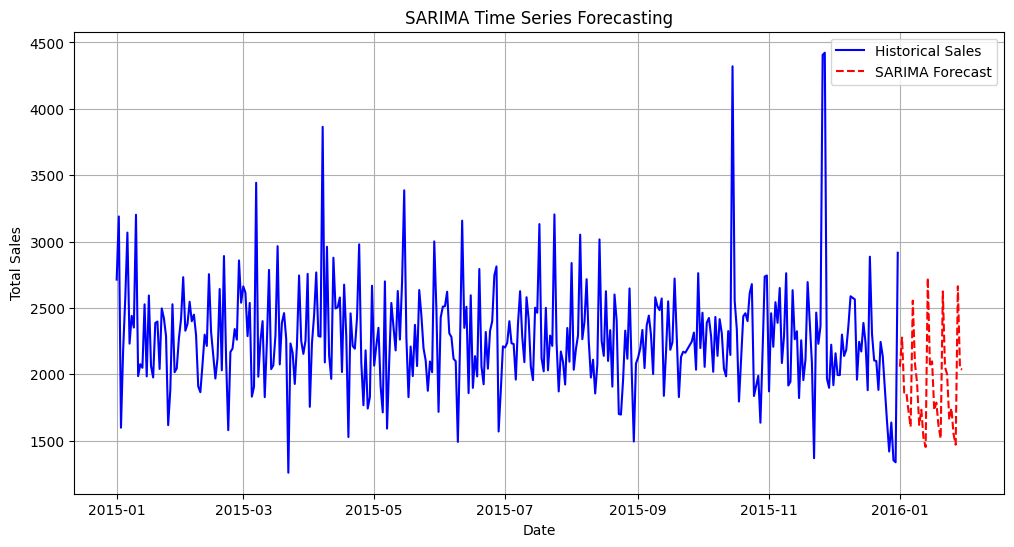

Forecasted Sales for the Next 30 Days:
358    2057.610542
359    2277.285038
360    1862.596033
361    1864.696443
362    1725.118814
363    1605.222556
364    2555.200919
365    2085.013955
366    1935.827879
367    1619.559757
368    1733.225545
369    1519.113031
370    1453.139070
371    2727.448380
372    2056.844755
373    2098.089717
374    1731.010009
375    1787.078123
376    1611.445611
377    1517.633275
378    2624.500783
379    2057.365936
380    2000.297381
381    1659.450087
382    1745.254057
383    1549.755538
384    1470.315273
385    2663.627684
386    2043.075182
387    2036.762784
Name: predicted_mean, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the processed dataset
processed_file_path = r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv"
df_processed = pd.read_csv(processed_file_path)

# Convert order_date to datetime
df_processed['order_date'] = pd.to_datetime(df_processed['order_date'])

# Aggregate sales by day
daily_sales = df_processed.groupby('order_date')['total_price'].sum()

# Fit SARIMA model with optimized parameters
sarima_model = SARIMAX(daily_sales, order=(1, 1, 1), seasonal_order=(1, 1, 0, 7), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Forecast next 30 days
forecast_steps = 30
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=daily_sales.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label='Historical Sales', color='blue')
plt.plot(forecast_index, forecast_values, label='SARIMA Forecast', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('SARIMA Time Series Forecasting')
plt.legend()
plt.grid()
plt.show()

# Print forecast values
print("Forecasted Sales for the Next 30 Days:")
print(forecast_values)


In [11]:

df = pd.read_csv(r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv")
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,is_weekend,is_holiday,is_promo_period
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,1,0,1,1
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,1,0,1,1
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,1,0,1,1
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,1,0,1,1
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,3,12,0,1,0
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,3,12,0,1,0
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3,12,0,1,0
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,12,0,1,0


residual analysis, error metrics, and visualizations.

c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


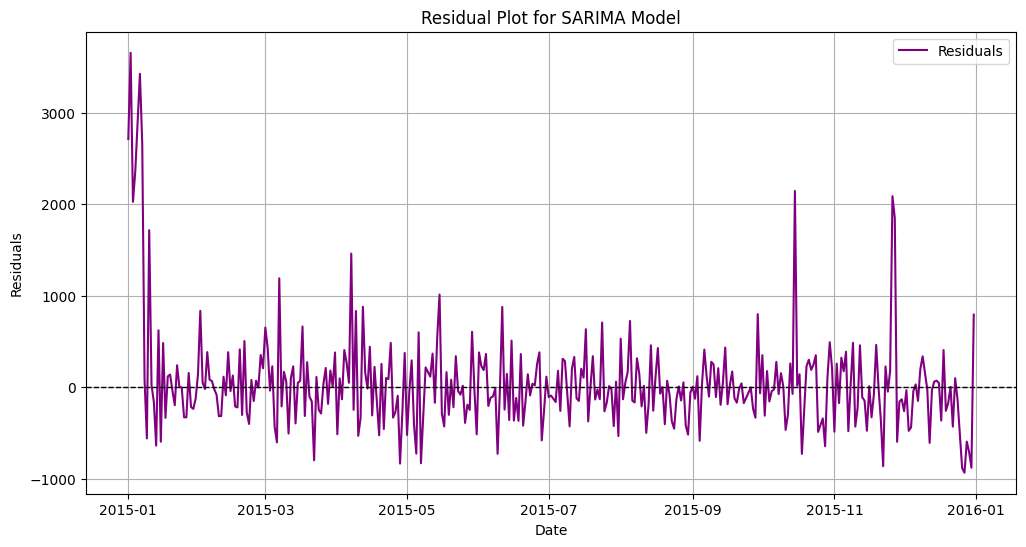

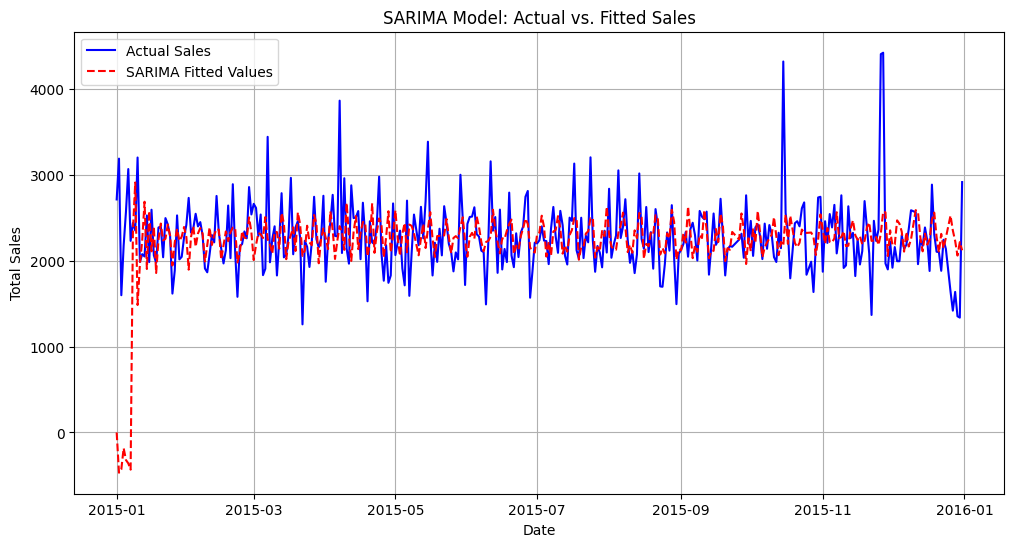

SARIMA Model Performance Metrics:
MAE: 342.13
RMSE: 572.05
MAPE: 14.98%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
file_path = r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv" 
df = pd.read_csv(file_path, parse_dates=["order_date"])

# Aggregate sales data by date
daily_sales = df.groupby("order_date")["total_price"].sum()

# Fit the SARIMA model (1,0,1)x(1,1,1,7)
sarima_model = sm.tsa.statespace.SARIMAX(daily_sales, 
                                         order=(1,0,1), 
                                         seasonal_order=(1,1,1,7), 
                                         enforce_stationarity=False, 
                                         enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Get fitted values
sarima_fitted_values = sarima_results.fittedvalues

# Calculate residuals
residuals = daily_sales - sarima_fitted_values

# Compute error metrics
sarima_mae = mean_absolute_error(daily_sales, sarima_fitted_values)
sarima_rmse = np.sqrt(mean_squared_error(daily_sales, sarima_fitted_values))
sarima_mape = np.mean(np.abs((daily_sales - sarima_fitted_values) / daily_sales)) * 100

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, residuals, label="Residuals", color="purple")
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.title("Residual Plot for SARIMA Model")
plt.legend()
plt.grid()
plt.show()

# Plot actual vs. fitted values
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label="Actual Sales", color="blue")
plt.plot(daily_sales.index, sarima_fitted_values, label="SARIMA Fitted Values", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("SARIMA Model: Actual vs. Fitted Sales")
plt.legend()
plt.grid()
plt.show()

# Output SARIMA error metrics
print("SARIMA Model Performance Metrics:")
print(f"MAE: {sarima_mae:.2f}")
print(f"RMSE: {sarima_rmse:.2f}")
print(f"MAPE: {sarima_mape:.2f}%")


Optimized SARIMA Code

In [13]:
import pandas as pd
import numpy as np
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Suppress warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv(r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv", parse_dates=["order_date"])
df.set_index("order_date", inplace=True)

# Aggregate sales by day
daily_sales = df.resample("D").sum()["total_price"]

# Define the range of p, d, q and seasonal (P, D, Q, s) parameters
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 7  # Weekly seasonality

# Generate all parameter combinations
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in itertools.product(P, D, Q)]

# Grid Search for the Best SARIMA Model
best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(daily_sales, order=(param[0], param[1], param[2]),
                            seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results

        except Exception as e:
            continue  # Ignore failed models

# Print the best model
print(f"Best SARIMA Model: Order {best_pdq} Seasonal {best_seasonal_pdq} with AIC: {best_aic}")

# Forecast Next 30 Days
forecast = best_model.get_forecast(steps=30)
forecast_index = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_values = forecast.predicted_mean

# Convert to DataFrame
forecast_df = pd.DataFrame({"date": forecast_index, "predicted_sales": forecast_values})
forecast_df.set_index("date", inplace=True)
print(forecast_df)

# Evaluate the model
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

model = SARIMAX(train, order=best_pdq, seasonal_order=best_seasonal_pdq)
results = model.fit()

# Forecast on test set
predictions = results.get_forecast(steps=len(test)).predicted_mean

# Performance metrics
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
mape = np.mean(np.abs((test - predictions) / test)) * 100

print(f"Optimized SARIMA Performance:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")


Best SARIMA Model: Order (1, 1, 2) Seasonal (0, 1, 1, 7) with AIC: 5310.37348855984
            predicted_sales
date                       
2016-01-01      2469.158196
2016-01-02      2190.248257
2016-01-03      1890.878428
2016-01-04      2006.064995
2016-01-05      2128.889028
2016-01-06      2132.084835
2016-01-07      2193.086957
2016-01-08      2374.758546
2016-01-09      2240.280914
2016-01-10      1854.964972
2016-01-11      2021.294767
2016-01-12      2113.685430
2016-01-13      2134.990966
2016-01-14      2185.216685
2016-01-15      2373.300897
2016-01-16      2235.007359
2016-01-17      1851.962116
2016-01-18      2016.940706
2016-01-19      2110.135419
2016-01-20      2130.962495
2016-01-21      2181.472927
2016-01-22      2369.387717
2016-01-23      2231.194996
2016-01-24      1848.089761
2016-01-25      2013.104049
2016-01-26      2106.277520
2016-01-27      2127.117237
2016-01-28      2177.620147
2016-01-29      2365.539413
2016-01-30      2227.344028
Optimized SARIMA Per

Model training 

C:\Users\91809\AppData\Local\Temp\ipykernel_6800\3396186433.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_price'].fillna(method='ffill', inplace=True)
C:\Users\91809\AppData\Local\Temp\ipykernel_6800\3396186433.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['total_price'].fillna(method='ffill', inplace=True)


                                     SARIMAX Results                                     
Dep. Variable:                       total_price   No. Observations:                  292
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -2007.180
Date:                           Wed, 02 Apr 2025   AIC                           4024.361
Time:                                   21:59:09   BIC                           4042.463
Sample:                               01-01-2015   HQIC                          4031.625
                                    - 10-19-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0764      0.714      0.107      0.915      -1.323       1.476
ma.L1         -0.1295      0.705     -0.184

C:\Users\91809\AppData\Local\Temp\ipykernel_6800\3396186433.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions.predicted_mean


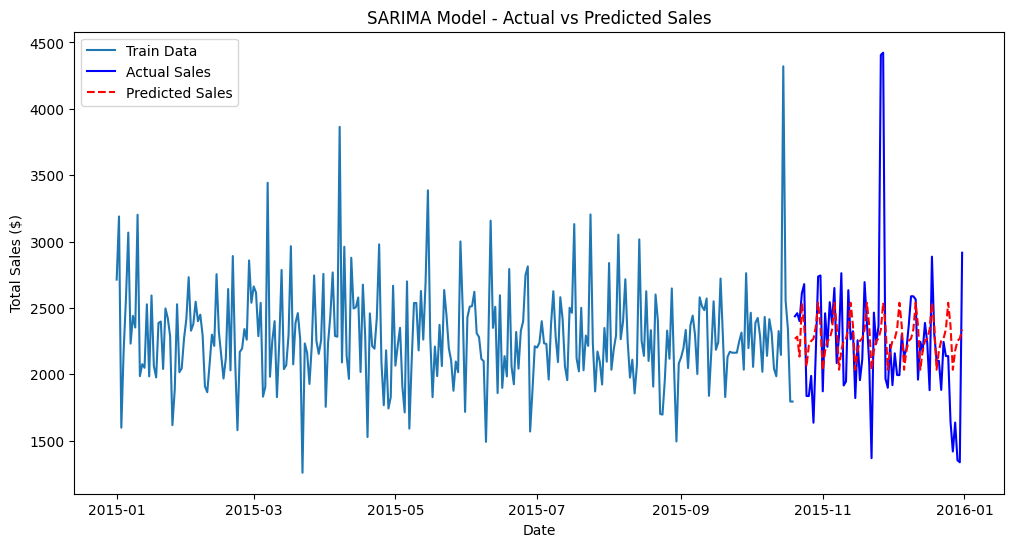

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib  # For saving the model

# Load the processed sales data
file_path = r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv"  
df = pd.read_csv(file_path, parse_dates=['order_date'])
df = df.groupby('order_date')['total_price'].sum().reset_index()

# Set order_date as index
df.set_index('order_date', inplace=True)
df = df.asfreq('D')  # Ensure it's a daily time series

# Handle missing values (if any)
df['total_price'].fillna(method='ffill', inplace=True)

# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define SARIMA Model Order (based on previous analysis)
p, d, q = 1, 0, 1
P, D, Q, s = 1, 1, 1, 7  # Weekly seasonality

# Train SARIMA Model
sarima_model = sm.tsa.statespace.SARIMAX(
    train['total_price'],
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit()

# Model Summary
print(sarima_result.summary())

# Forecast on Test Data
predictions = sarima_result.get_forecast(steps=len(test))
test['predicted'] = predictions.predicted_mean

# Evaluate Model Performance
mae = mean_absolute_error(test['total_price'], test['predicted'])
rmse = np.sqrt(mean_squared_error(test['total_price'], test['predicted']))
mape = np.mean(np.abs((test['total_price'] - test['predicted']) / test['total_price'])) * 100

print(f"\nSARIMA Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Save the Model
joblib.dump(sarima_result, "sarima_pizza_sales_model.pkl")
print("SARIMA Model saved successfully!")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total_price'], label="Train Data")
plt.plot(test.index, test['total_price'], label="Actual Sales", color='blue')
plt.plot(test.index, test['predicted'], label="Predicted Sales", color='red', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("SARIMA Model - Actual vs Predicted Sales")
plt.legend()
plt.show()


In [16]:
df = pd.read_csv(r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv")

df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,is_weekend,is_holiday,is_promo_period
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,1,0,1,1
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,1,0,1,1
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,1,0,1,1
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,1,0,1,1
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,3,12,0,1,0
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,3,12,0,1,0
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3,12,0,1,0
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,12,0,1,0


Sales forcast 

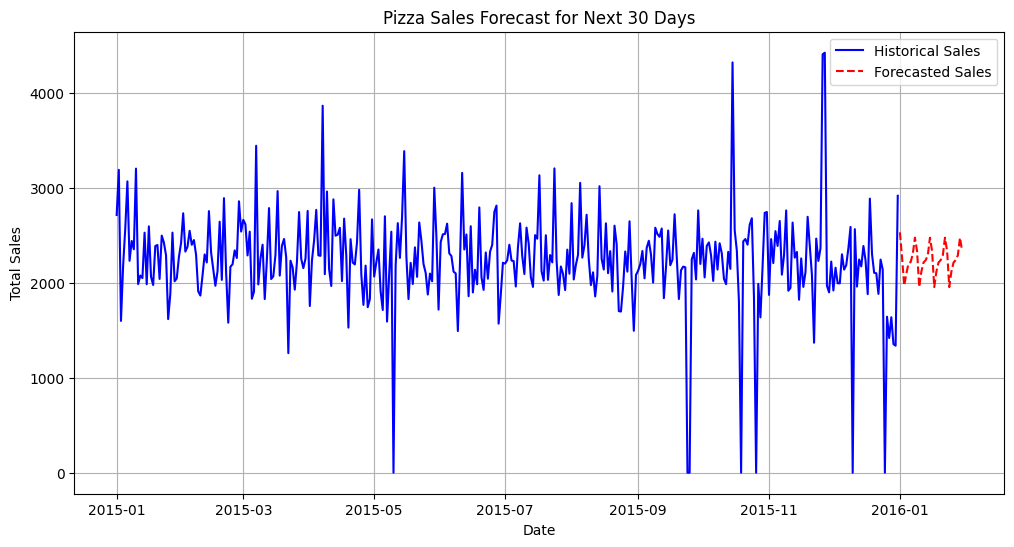

Forecasted Sales for the Next 30 Days:
          Date  Predicted_Sales
0  2016-01-01      2531.415932
1  2016-01-02      2268.193245
2  2016-01-03      1969.807320
3  2016-01-04      2095.474991
4  2016-01-05      2203.527308
5  2016-01-06      2217.636140
6  2016-01-07      2302.736218
7  2016-01-08      2474.831001
8  2016-01-09      2333.235011
9  2016-01-10      1954.297675
10 2016-01-11      2117.523081
11 2016-01-12      2213.650200
12 2016-01-13      2238.089626
13 2016-01-14      2289.125636
14 2016-01-15      2474.526838
15 2016-01-16      2334.107868
16 2016-01-17      1954.193132
17 2016-01-18      2117.855432
18 2016-01-19      2213.897505
19 2016-01-20      2238.465245
20 2016-01-21      2288.871571
21 2016-01-22      2474.514813
22 2016-01-23      2334.127968
23 2016-01-24      1954.189582
24 2016-01-25      2117.862682
25 2016-01-26      2213.901970
26 2016-01-27      2238.472779
27 2016-01-28      2288.866508
28 2016-01-29      2474.514624
29 2016-01-30      2334.128338

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the processed dataset
df = pd.read_csv(r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv"  , parse_dates=["order_date"], index_col="order_date")

# Aggregate daily sales
daily_sales = df.resample("D")["total_price"].sum()

# Define SARIMA parameters (from previous tuning)
order = (1, 0, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s)

# Train SARIMA model
sarima_model = SARIMAX(daily_sales, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = sarima_model.fit()

# Forecast for the next 30 days
forecast_steps = 30
future_dates = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="D")
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Convert forecast to DataFrame
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted_Sales": forecast_values.values})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label="Historical Sales", color='blue')
plt.plot(forecast_df["Date"], forecast_df["Predicted_Sales"], label="Forecasted Sales", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Pizza Sales Forecast for Next 30 Days")
plt.legend()
plt.grid()
plt.show()

# Save forecast to CSV
forecast_df.to_csv("Pizza_Sales_Forecast.csv", index=False)

print("Forecasted Sales for the Next 30 Days:\n", forecast_df)


In [22]:
import pandas as pd
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load processed pizza sales data
data_path = r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv"
df = pd.read_csv(data_path, parse_dates=["order_date"])

# Ensure proper sorting and indexing
df = df.sort_values("order_date").set_index("order_date")

# Load the trained SARIMA model
with open("sarima_model.pkl", "rb") as model_file:
    sarima_model = pickle.load(model_file)

# Forecast next 30 days
future_steps = 30
future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=future_steps, freq='D')
predictions = sarima_model.get_forecast(steps=future_steps).predicted_mean

# Create DataFrame for predicted sales
predicted_sales = pd.DataFrame({
    "order_date": future_dates,
    "predicted_total_price": predictions.values
})

# Drop duplicate metadata and ensure required columns exist
pizza_metadata = df.reset_index().drop_duplicates(subset=["pizza_id", "pizza_name_id", "pizza_size", "pizza_category", "unit_price"])

# Ensure 'order_date' is retained after merging
predicted_sales["key"] = 1
pizza_metadata["key"] = 1
predicted_sales = predicted_sales.merge(pizza_metadata, on="key").drop(columns=["key"])

# Adjust quantity and total price
def calculate_quantity(price, unit_price):
    return max(1, round(price / unit_price))

predicted_sales["quantity"] = predicted_sales.apply(lambda row: calculate_quantity(row["predicted_total_price"], row["unit_price"]), axis=1)
predicted_sales["total_price"] = predicted_sales["quantity"] * predicted_sales["unit_price"]

# Verify columns before selection
print(predicted_sales.columns)

# Ensure all required columns exist
required_columns = ["pizza_id", "order_date", "pizza_name_id", "quantity", "unit_price", "total_price", "pizza_size", "pizza_category"]

# Drop missing columns from the selection
existing_columns = [col for col in required_columns if col in predicted_sales.columns]
predicted_sales = predicted_sales[existing_columns]

# Save as CSV
output_path = r"C:\Soundhar\VS Code\project\Dominos\predicted_sales.csv"
predicted_sales.to_csv(output_path, index=False)

print(f"Sales forecast saved as {output_path}")


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Index(['order_date_x', 'predicted_total_price', 'order_date_y', 'pizza_id',
       'order_id', 'pizza_name_id', 'quantity', 'order_time', 'unit_price',
       'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'pizza_name', 'day_of_week', 'month', 'is_weekend', 'is_holiday',
       'is_promo_period'],
      dtype='object')
Sales forecast saved as C:\Soundhar\VS Code\project\Dominos\predicted_sales.csv


In [24]:
import pandas as pd
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load processed pizza sales data
data_path = r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv"
df = pd.read_csv(data_path, parse_dates=["order_date"])

# Ensure data is sorted and indexed
df = df.sort_values("order_date").set_index("order_date")

# Load the trained SARIMA model
with open("sarima_model.pkl", "rb") as model_file:
    sarima_model = pickle.load(model_file)

# Forecast for next 30 days
future_steps = 30
future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=future_steps, freq='D')
predictions = sarima_model.get_forecast(steps=future_steps).predicted_mean

# Create DataFrame for predicted sales
predicted_sales = pd.DataFrame({
    "order_date": future_dates,
    "predicted_total_price": predictions.values
})

# Get pizza metadata (removing duplicates)
pizza_metadata = df.reset_index().drop_duplicates(subset=["pizza_id", "pizza_name_id", "pizza_size", "pizza_category", "unit_price"])

# Ensure "order_date" is preserved after merging
predicted_sales["key"] = 1
pizza_metadata["key"] = 1
predicted_sales = predicted_sales.merge(pizza_metadata, on="key").drop(columns=["key"])

# Adjust quantity and total price
def calculate_quantity(price, unit_price):
    return max(1, round(price / unit_price))

predicted_sales["quantity"] = predicted_sales.apply(lambda row: calculate_quantity(row["predicted_total_price"], row["unit_price"]), axis=1)
predicted_sales["total_price"] = predicted_sales["quantity"] * predicted_sales["unit_price"]

# Ensure "order_date" exists in final DataFrame
if "order_date_x" in predicted_sales.columns:
    predicted_sales.rename(columns={"order_date_x": "order_date"}, inplace=True)

# Select required columns
required_columns = ["pizza_id", "order_date", "pizza_name_id", "quantity", "unit_price", "total_price", "pizza_size", "pizza_category"]
predicted_sales = predicted_sales[required_columns]

# Save as CSV
output_path = r"C:\Soundhar\VS Code\project\Dominos\predicted_sales_one_month.csv"
predicted_sales.to_csv(output_path, index=False)

print(f"One-month sales forecast saved as {output_path}")


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


One-month sales forecast saved as C:\Soundhar\VS Code\project\Dominos\predicted_sales_one_month.csv


Calculating the required ingredient quantities based on forecasted sales

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load historical sales data
sales_data = pd.read_csv(r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv", parse_dates=["order_date"])
sales_data.set_index("order_date", inplace=True)

# Aggregate daily sales
daily_sales = sales_data.resample("D").sum()["total_price"]

# Train SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(daily_sales, order=(1,0,1), seasonal_order=(1,1,1,7))
results = sarima_model.fit()

# Forecast next 30 days
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=daily_sales.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_sales = pd.DataFrame({"Date": forecast_index, "Predicted_Sales": forecast.predicted_mean.values})
forecast_sales.to_csv(r"C:\Soundhar\VS Code\project\Dominos\Pizza_Sales_Forecast.csv", index=False)

# Load ingredient data
ingredients_data = pd.read_csv(r"C:\Soundhar\VS Code\project\Dominos\Cleaned_Pizza_Ingredients.csv")

# Calculate required ingredient quantities
ingredient_usage = ingredients_data.groupby("pizza_ingredients")["Items_Qty_In_Grams"].sum().reset_index()
total_forecasted_sales = forecast_sales["Predicted_Sales"].sum()
avg_pizza_sales = total_forecasted_sales / len(ingredients_data["pizza_name_id"].unique())
ingredient_usage["Total_Required_Grams"] = ingredient_usage["Items_Qty_In_Grams"] * avg_pizza_sales

# Save ingredient requirements
ingredient_usage.to_csv("Required_Ingredients.csv", index=False)

print("Model training, forecasting, and ingredient calculation completed. Output saved to CSV files.")


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model training, forecasting, and ingredient calculation completed. Output saved to CSV files.


Purchase Order Creation

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import re

# Load data
sales_df = pd.read_csv(r"C:\Soundhar\VS Code\project\Dominos\Processed_Pizza_Sales.csv", parse_dates=['order_date'])
sales_df = sales_df.sort_values('order_date')
sales_df.set_index('order_date', inplace=True)

# Aggregate daily sales
daily_sales = sales_df.resample('D').sum()['total_price']

# Train SARIMA model
model = SARIMAX(daily_sales, order=(1, 0, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)

# Forecast next 30 days
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
predicted_sales = forecast.predicted_mean
predicted_sales.index.name = 'order_date'

# Save forecast to CSV
predicted_sales.to_csv("Pizza_Sales_Forecast.csv", header=['predicted_total_price'])

# Load ingredients dataset
ingredients_df = pd.read_csv(r"C:\Soundhar\VS Code\project\Dominos\Cleaned_Pizza_Ingredients.csv")

# Merge forecast with historical average pizza prices
pizza_avg_price = sales_df.groupby('pizza_name_id')['unit_price'].mean()
predicted_units = predicted_sales.sum() / pizza_avg_price.mean()  # Approx total pizzas

# Estimate demand per pizza type (based on historical proportions)
pizza_counts = sales_df['pizza_name_id'].value_counts(normalize=True)
predicted_pizza_demand = pizza_counts * predicted_units

# Clean and map ingredients
ingredient_demand = {}

for index, row in ingredients_df.iterrows():
    pizza_id = row['pizza_name_id']
    if pizza_id in predicted_pizza_demand:
        ingredients = re.split(r',\s*', row['pizza_ingredients'].lower())
        for ingredient in ingredients:
            if ingredient in ingredient_demand:
                ingredient_demand[ingredient] += predicted_pizza_demand[pizza_id]
            else:
                ingredient_demand[ingredient] = predicted_pizza_demand[pizza_id]

# Create purchase order DataFrame
purchase_order_df = pd.DataFrame.from_dict(ingredient_demand, orient='index', columns=['required_quantity'])
purchase_order_df.index.name = 'ingredient'
purchase_order_df = purchase_order_df.sort_values(by='required_quantity', ascending=False)

# Save to CSV
purchase_order_df.to_csv("Ingredient_Purchase_Order.csv")

print("SARIMA forecast, ingredient calculation, and purchase order completed and saved.")


c:\Users\91809\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA forecast, ingredient calculation, and purchase order completed and saved.
